## Один датасет

In [1]:
import pandas
import numpy as np
import lingtypology
import matplotlib.pyplot as plt
from scipy.stats import linregress
from lingtypology.db_apis import Phoible

In [2]:
def draw_plot(dots, regr):
    plt.cla()
    plt.scatter(*dots, color='black')
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = regr.intercept + regr.slope*x_vals 
    plt.plot(x_vals, y_vals, linewidth=3)

In [34]:
def count_stats(subset):
    p = lingtypology.db_apis.Phoible(subset=subset)
    p.show_citation = False
    data = p.get_df()
    data = pandas.DataFrame({
        'language': data.language,
        'elevation': lingtypology.get_elevations(data.language),
        'phonemes': data.phonemes,
        'vowels': data.vowels,
        'consonants': data.consonants,
        'consonants_vowels_rate': data.consonants/data.vowels
    })
    data = data[data.elevation != '']
    regressions = {}
    dots = {}
    for datum in data:
        if datum in ('language', 'elevations'):
            continue
        regressions[datum] = linregress(
            list(map(int, data[datum])),
            list(map(int, data.elevation))
        )
        dots[datum] = (data[datum], data.elevation)
    return regressions, dots

In [39]:
regressions, dots = count_stats('UPSID')

Elevations for these languages were not found:
A-Pucikwar
Itelmen


In [38]:
regressions['phonemes']

LinregressResult(slope=10.432459403261543, intercept=323.73160289673035, rvalue=0.16116339424610862, pvalue=0.000608256767882532, stderr=3.021703806057043)

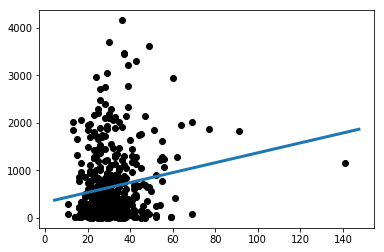

In [27]:
draw_plot(dots['phonemes'], regressions['phonemes'])

In [28]:
regressions['consonants']

LinregressResult(slope=14.805536489349851, intercept=314.2163403618263, rvalue=0.18800942998180317, pvalue=6.109392580688713e-05, stderr=3.6582736718422084)

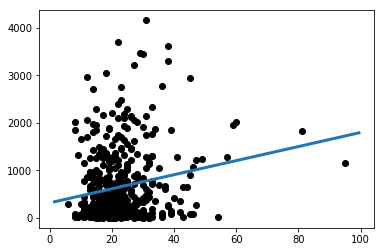

In [29]:
draw_plot(dots['consonants'], regressions['consonants'])

In [30]:
regressions['vowels']

LinregressResult(slope=2.4981244480329874, intercept=625.6751995735278, rvalue=0.015981512722593672, pvalue=0.7355743710685303, stderr=7.392425472346068)

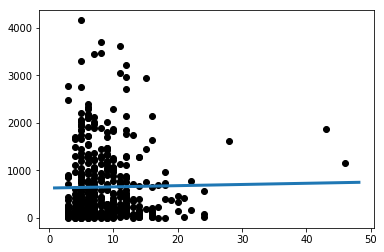

In [31]:
draw_plot(dots['vowels'], regressions['vowels'])

In [32]:
regressions['consonants_vowels_rate']

LinregressResult(slope=31.501458784301683, intercept=557.6161313309219, rvalue=0.08855732345890528, pvalue=0.06079954793376542, stderr=16.75879366733996)

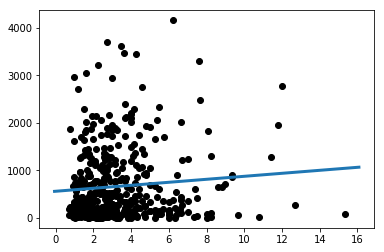

In [36]:
draw_plot(dots['consonants_vowels_rate'], regressions['consonants_vowels_rate'])

# Все датасеты

In [48]:
subsets = ['UPSID', 'SPA', 'AA', 'PH', 'GM', 'RA', 'SAPHON']
phonemes = []
vowels = []
consonants = []
rate = []
for subset in subsets:
    result = count_stats(subset)[0]
    phonemes.append('%.015f' % result['phonemes'].pvalue)
    vowels.append('%.015f' % result['vowels'].pvalue)
    consonants.append('%.015f' % result['consonants'].pvalue)
    rate.append('%.015f' % result['consonants_vowels_rate'].pvalue)

result = pandas.DataFrame({
    'Dataset': subsets,
    'Phonemes': phonemes,
    'Consonants': consonants,
    'Vowels': vowels,
    'Consonants/Vowels': rate,
})

Elevations for these languages were not found:
A-Pucikwar
Itelmen
Elevations for these languages were not found:
Kaliai
Straits Salish
Katcha
Nama
Elevations for these languages were not found:
Ezaa
Ikwo
Elevations for these languages were not found:
Korafe
Endo
Huron
Kuay
Mvumbo
Mianmin
Samre or Siem Reap
Saanich
Karo
Bikele
Croatian
Ke'o
Miraña
Khithaulhu
Elevations for these languages were not found:
Ikalanga
Copi
Mmani
Frafra
Oko
Dinka
Besleri
Soddo
Ezha
Chaha
Gumer
Zayse
Efutu
Kambe
Kauma
Moghamo
Pana
Elevations for these languages were not found:
A-Pucikwar
Abujmaria
Mising
Naiki
Elevations for these languages were not found:
Miraña
Khithaulhu


In [49]:
result

,Dataset,Phonemes,Consonants,Vowels,Consonants/Vowels
0,UPSID,0.000608256767883,0.000061093925807,0.735574371068530,0.060799547933765
1,SPA,0.442271821395142,0.131863896642119,0.225274599719403,0.234058806198062
2,AA,0.778894870953447,0.070396482658097,0.111076399459983,0.101167945912772
3,PH,0.000000031636053,0.000000000001764,0.966811069616848,0.000050806871123
4,GM,0.006770372800662,0.000016540749057,0.025402244929873,0.000996723136317
5,RA,0.012336298397485,0.000531043658961,0.846388845850866,0.058472073331892
6,SAPHON,0.026116506165129,0.000070140949514,0.352024289957407,0.032804731458930
